In [1]:
import tensorflow as tf

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

from datetime import datetime

import sys
sys.path.append("../")

from input.mlproject.model_utility import * 
from input.mlproject.utility import * 

In [2]:
print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))

2.6.4
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2022-11-21 22:10:10.424647: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-21 22:10:10.425701: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-21 22:10:10.426382: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [3]:
LOOKBACK = 61
TRAIN_SPLIT_RATIO = 0.9
columns = [CLOSE_INDEX]

In [4]:
todays_date = datetime.now().strftime('%Y-%m-%d')
download_monthly_klines('spot', [BTC], ['15m'], '2019-01-01', todays_date, 'train')

Found 1 symbols
[1/1] - start download monthly BTCUSDT klines 

File Download: /kaggle/working/train/BTCUSDT/BTCUSDT-15m-2019-01.zip
[##################################################]
File Download: /kaggle/working/train/BTCUSDT/BTCUSDT-15m-2019-02.zip
[##################################################]
File Download: /kaggle/working/train/BTCUSDT/BTCUSDT-15m-2019-03.zip
[##################################################]
File Download: /kaggle/working/train/BTCUSDT/BTCUSDT-15m-2019-04.zip
[##################################################]
File Download: /kaggle/working/train/BTCUSDT/BTCUSDT-15m-2019-05.zip
[##################################################]
File Download: /kaggle/working/train/BTCUSDT/BTCUSDT-15m-2019-06.zip
[##################################################]
File Download: /kaggle/working/train/BTCUSDT/BTCUSDT-15m-2019-07.zip
[##################################################]
File Download: /kaggle/working/train/BTCUSDT/BTCUSDT-15m-2019-08.zip
[############

In [5]:
dataframe = get_data('train', BTC)

train/BTCUSDT/BTCUSDT-15m-2019-01.csv
train/BTCUSDT/BTCUSDT-15m-2019-02.csv
train/BTCUSDT/BTCUSDT-15m-2019-03.csv
train/BTCUSDT/BTCUSDT-15m-2019-04.csv
train/BTCUSDT/BTCUSDT-15m-2019-05.csv
train/BTCUSDT/BTCUSDT-15m-2019-06.csv
train/BTCUSDT/BTCUSDT-15m-2019-07.csv
train/BTCUSDT/BTCUSDT-15m-2019-08.csv
train/BTCUSDT/BTCUSDT-15m-2019-09.csv
train/BTCUSDT/BTCUSDT-15m-2019-10.csv
train/BTCUSDT/BTCUSDT-15m-2019-11.csv
train/BTCUSDT/BTCUSDT-15m-2019-12.csv
train/BTCUSDT/BTCUSDT-15m-2020-01.csv
train/BTCUSDT/BTCUSDT-15m-2020-02.csv
train/BTCUSDT/BTCUSDT-15m-2020-03.csv
train/BTCUSDT/BTCUSDT-15m-2020-04.csv
train/BTCUSDT/BTCUSDT-15m-2020-05.csv
train/BTCUSDT/BTCUSDT-15m-2020-06.csv
train/BTCUSDT/BTCUSDT-15m-2020-07.csv
train/BTCUSDT/BTCUSDT-15m-2020-08.csv
train/BTCUSDT/BTCUSDT-15m-2020-09.csv
train/BTCUSDT/BTCUSDT-15m-2020-10.csv
train/BTCUSDT/BTCUSDT-15m-2020-11.csv
train/BTCUSDT/BTCUSDT-15m-2020-12.csv
train/BTCUSDT/BTCUSDT-15m-2021-01.csv
train/BTCUSDT/BTCUSDT-15m-2021-02.csv
train/BTCUSD

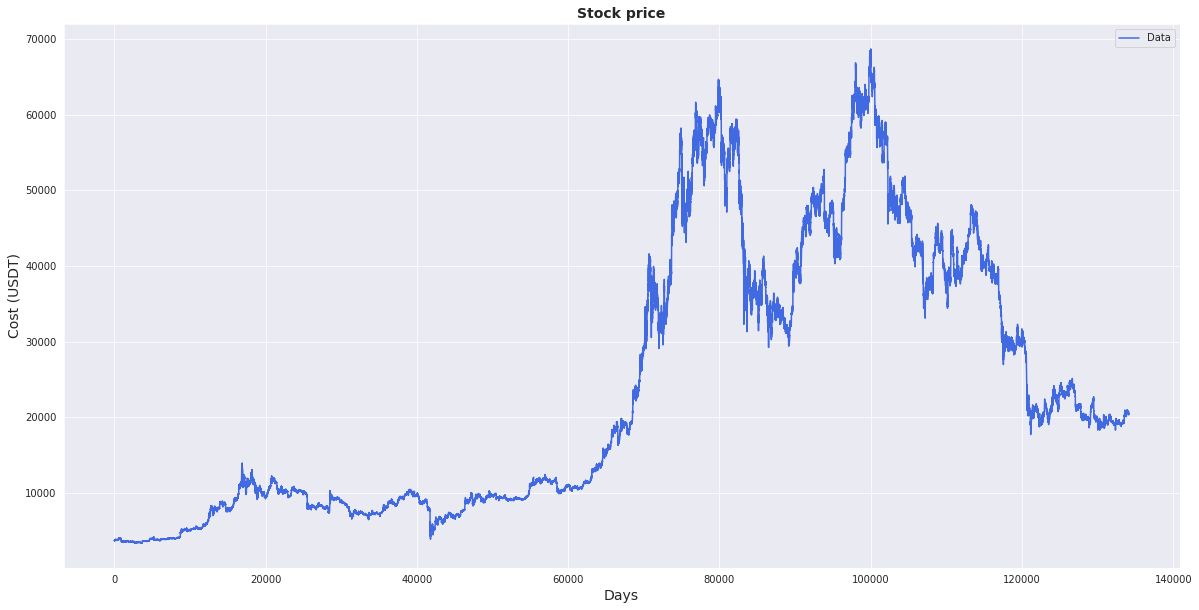

In [6]:
dataframe = dataframe[dataframe[IGNORE_INDEX] == 0]
plot_graph(pd.DataFrame(dataframe[CLOSE_INDEX].values))

In [7]:
scalers = {}
for col in columns:
    scaler = MinMaxScaler().fit(dataframe[[col]])
    dataframe[col] = scaler.transform(dataframe[[col]])
    scalers[col] = scaler

dataframe = dataframe[columns]

In [8]:
x_train, y_train, x_test, y_test = split_data(dataframe, LOOKBACK, TRAIN_SPLIT_RATIO, CLOSE_INDEX-4)

print('x_train.shape = {}'.format(x_train.shape))
print('y_train.shape = {}'.format(y_train.shape))
print('x_test.shape = {}'.format(x_test.shape))
print('y_test.shape = {}'.format(y_test.shape))

x_train.shape = (120668, 60, 1)
y_train.shape = (120668,)
x_test.shape = (13407, 60, 1)
y_test.shape = (13407,)


In [9]:
x_train = tf.convert_to_tensor(x_train, dtype=tf.float32)
x_test = tf.convert_to_tensor(x_test, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.float32)

2022-11-21 22:11:36.223105: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-21 22:11:36.224111: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-21 22:11:36.225579: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-21 22:11:36.226727: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA 

In [10]:
input_dim = x_train.shape[1]
n_features = x_train.shape[2]
output_dim = 1

batch_size = 1000

In [11]:
lstm_model1 = tf.keras.Sequential()

lstm_model1.add(tf.keras.layers.LSTM(256, input_shape=(input_dim, n_features)))
lstm_model1.add(tf.keras.layers.Dense(1))

lstm_model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 256)               264192    
_________________________________________________________________
dense (Dense)                (None, 1)                 257       
Total params: 264,449
Trainable params: 264,449
Non-trainable params: 0
_________________________________________________________________


In [12]:
lstm_model1.compile(loss=tf.keras.losses.MeanAbsoluteError(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [13]:
lstm_model1.fit(x_train, y_train, epochs=10)

2022-11-21 22:11:43.688409: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2022-11-21 22:11:46.106348: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


3771/3771 [==============================] - 27s 6ms/step - loss: 0.0043 - root_mean_squared_error: 0.0158
Epoch 2/10
3771/3771 [==============================] - 23s 6ms/step - loss: 0.0023 - root_mean_squared_error: 0.0037
Epoch 3/10
3771/3771 [==============================] - 23s 6ms/step - loss: 0.0019 - root_mean_squared_error: 0.0030
Epoch 4/10
3771/3771 [==============================] - 23s 6ms/step - loss: 0.0017 - root_mean_squared_error: 0.0028
Epoch 5/10
3771/3771 [==============================] - 23s 6ms/step - loss: 0.0017 - root_mean_squared_error: 0.0027
Epoch 6/10
3771/3771 [==============================] - 23s 6ms/step - loss: 0.0015 - root_mean_squared_error: 0.0025
Epoch 7/10
3771/3771 [==============================] - 23s 6ms/step - loss: 0.0015 - root_mean_squared_error: 0.0025
Epoch 8/10
3771/3771 [==============================] - 23s 6ms/step - loss: 0.0015 - root_mean_squared_error: 0.0025
Epoch 9/10
3771/3771 [==============================] - 23s 6ms/ste

In [14]:
lstm_model1.evaluate(x_test, y_test)

419/419 [==============================] - 2s 3ms/step - loss: 8.2402e-04 - root_mean_squared_error: 0.0012


[0.0008240154129453003, 0.0011994615197181702]

In [15]:
y_train_pred = lstm_model1.predict(x_train)

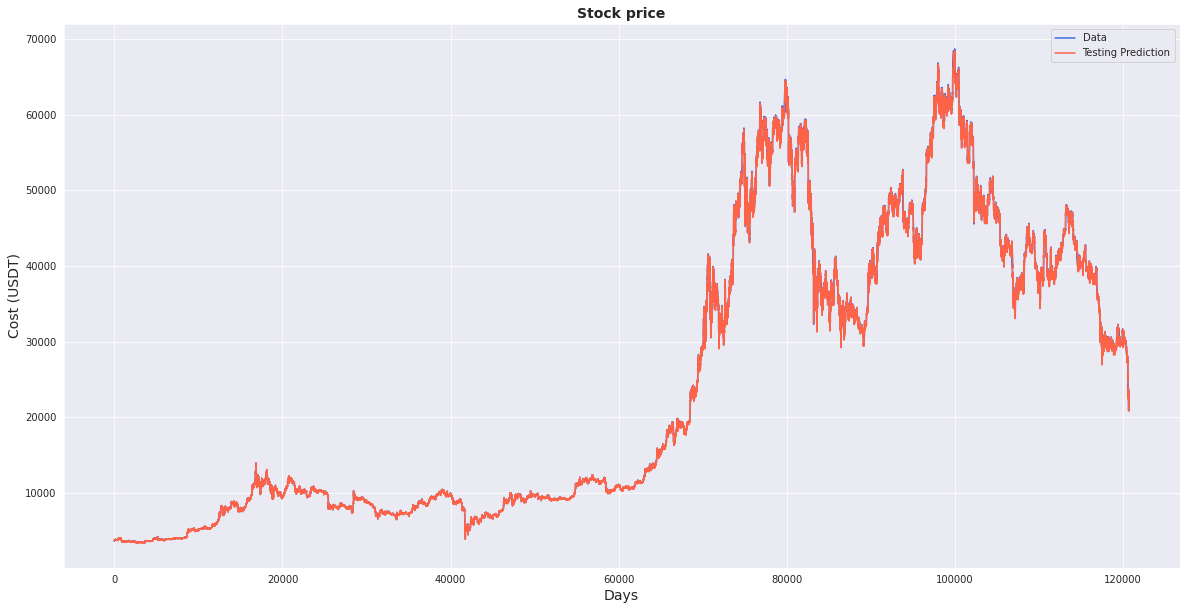

In [16]:
plot_graph(pd.DataFrame(scalers[CLOSE_INDEX].inverse_transform(y_train.numpy().reshape(-1, 1))), 
           pd.DataFrame(scalers[CLOSE_INDEX].inverse_transform(y_train_pred.reshape(-1, 1))))

In [17]:
y_test_pred = lstm_model1.predict(x_test)

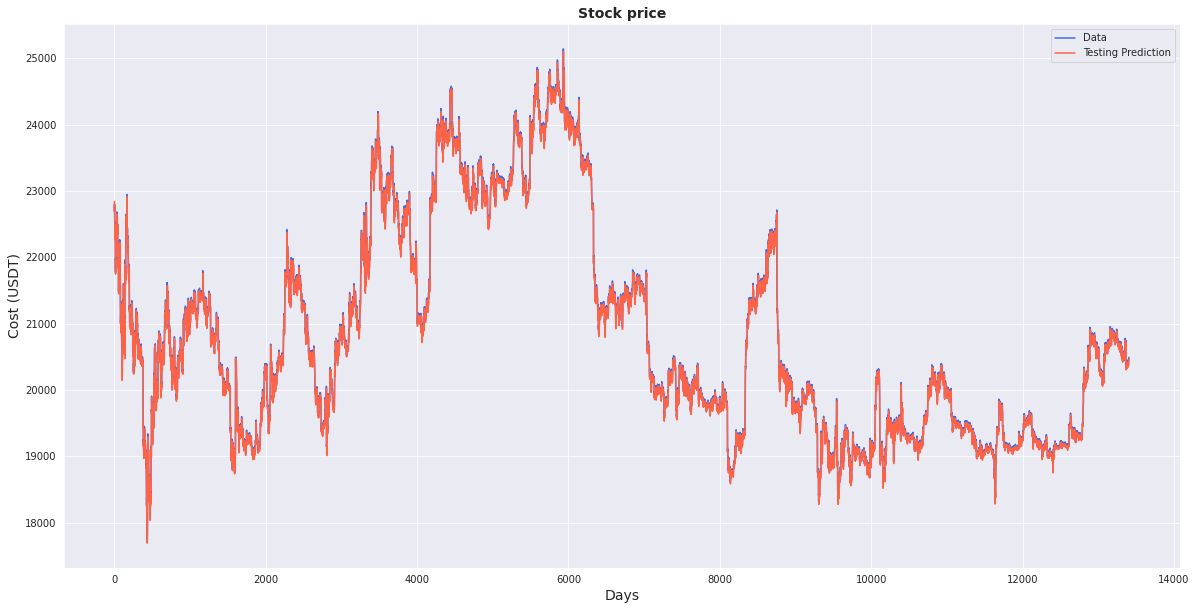

In [18]:
plot_graph(pd.DataFrame(scalers[CLOSE_INDEX].inverse_transform(y_test.numpy().reshape(-1, 1))), 
           pd.DataFrame(scalers[CLOSE_INDEX].inverse_transform(y_test_pred.reshape(-1, 1))))

In [19]:
lstm_model2 = tf.keras.Sequential()

lstm_model2.add(tf.keras.layers.LSTM(128 , return_sequences = True , input_shape=(input_dim, n_features)))
lstm_model2.add(tf.keras.layers.LSTM(128,  return_sequences = True ))
lstm_model2.add(tf.keras.layers.LSTM(128))

lstm_model2.add(tf.keras.layers.Dense(1))

lstm_model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 60, 128)           66560     
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 128)           131584    
_________________________________________________________________
lstm_3 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 329,857
Trainable params: 329,857
Non-trainable params: 0
_________________________________________________________________


In [20]:
lstm_model2.compile(loss=tf.keras.losses.MeanAbsoluteError(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [21]:
lstm_model2.fit(x_train, y_train, epochs=10)

Epoch 1/10
3771/3771 [==============================] - 45s 11ms/step - loss: 0.0067 - root_mean_squared_error: 0.0160
Epoch 2/10
3771/3771 [==============================] - 42s 11ms/step - loss: 0.0037 - root_mean_squared_error: 0.0057
Epoch 3/10
3771/3771 [==============================] - 42s 11ms/step - loss: 0.0033 - root_mean_squared_error: 0.0051
Epoch 4/10
3771/3771 [==============================] - 42s 11ms/step - loss: 0.0027 - root_mean_squared_error: 0.0041
Epoch 5/10
3771/3771 [==============================] - 42s 11ms/step - loss: 0.0027 - root_mean_squared_error: 0.0040
Epoch 6/10
3771/3771 [==============================] - 42s 11ms/step - loss: 0.0023 - root_mean_squared_error: 0.0035
Epoch 7/10
3771/3771 [==============================] - 42s 11ms/step - loss: 0.0022 - root_mean_squared_error: 0.0035
Epoch 8/10
3771/3771 [==============================] - 42s 11ms/step - loss: 0.0021 - root_mean_squared_error: 0.0033
Epoch 9/10
3771/3771 [==========================

In [22]:
y_train_pred = lstm_model2.predict(x_train)

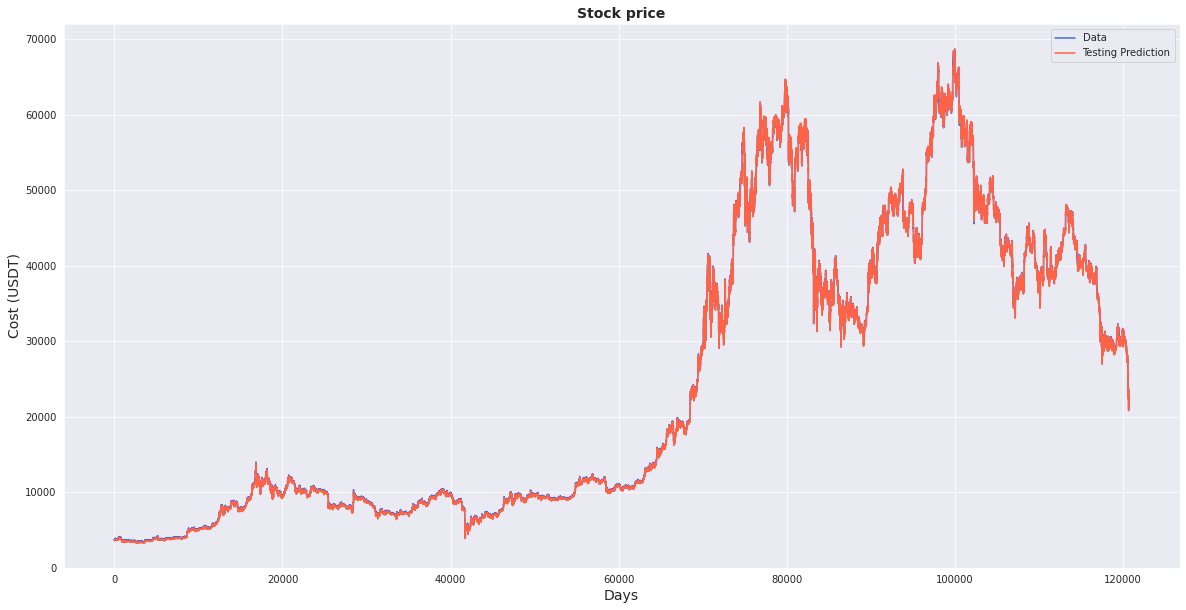

In [23]:
plot_graph(pd.DataFrame(scalers[CLOSE_INDEX].inverse_transform(y_train.numpy().reshape(-1, 1))), 
           pd.DataFrame(scalers[CLOSE_INDEX].inverse_transform(y_train_pred.reshape(-1, 1))))

In [24]:
y_test_pred = lstm_model2.predict(x_test)

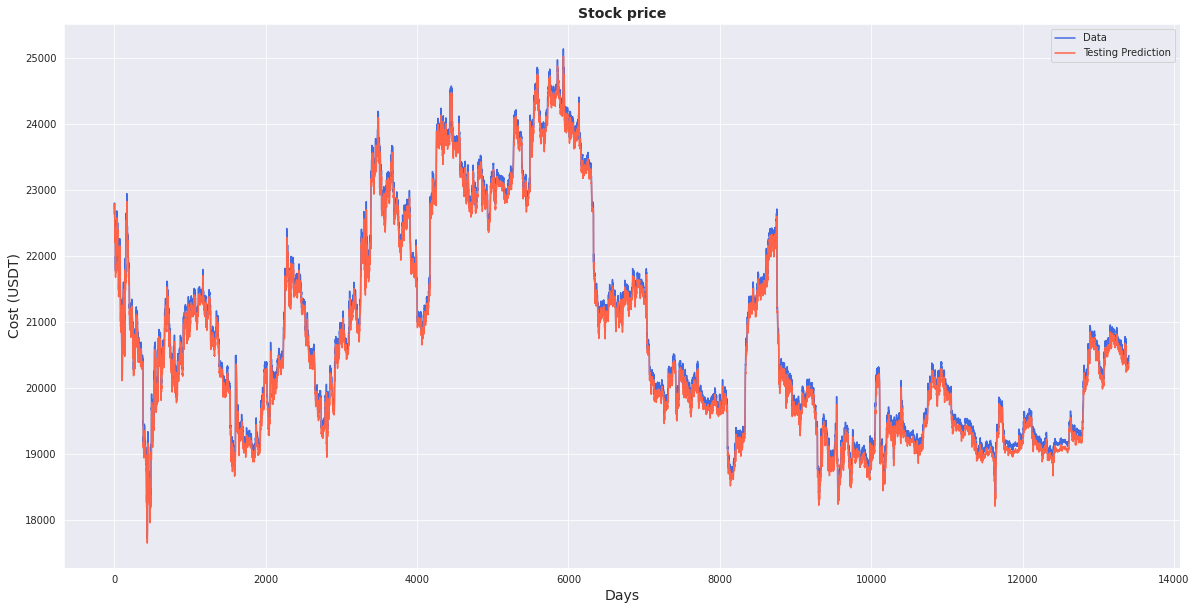

In [25]:
plot_graph(pd.DataFrame(scalers[CLOSE_INDEX].inverse_transform(y_test.numpy().reshape(-1, 1))), 
           pd.DataFrame(scalers[CLOSE_INDEX].inverse_transform(y_test_pred.reshape(-1, 1))))

In [26]:
lstm_model3 = tf.keras.Sequential()

lstm_model3.add(tf.keras.layers.LSTM(64 , return_sequences = True , input_shape=(input_dim, n_features)))
lstm_model3.add(tf.keras.layers.LSTM(64 ,  return_sequences = True ))
lstm_model3.add(tf.keras.layers.LSTM(64 ,  return_sequences = True ))
lstm_model3.add(tf.keras.layers.LSTM(64 ,  return_sequences = True ))
lstm_model3.add(tf.keras.layers.LSTM(64))

lstm_model3.add(tf.keras.layers.Dense(1))

lstm_model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 60, 64)            16896     
_________________________________________________________________
lstm_5 (LSTM)                (None, 60, 64)            33024     
_________________________________________________________________
lstm_6 (LSTM)                (None, 60, 64)            33024     
_________________________________________________________________
lstm_7 (LSTM)                (None, 60, 64)            33024     
_________________________________________________________________
lstm_8 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 149,057
Trainable params: 149,057
Non-trainable params: 0
________________________________________________

In [27]:
lstm_model3.compile(loss=tf.keras.losses.MeanAbsoluteError(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [28]:
lstm_model3.fit(x_train, y_train, epochs=10)

Epoch 1/10
3771/3771 [==============================] - 61s 15ms/step - loss: 0.0080 - root_mean_squared_error: 0.0180
Epoch 2/10
3771/3771 [==============================] - 56s 15ms/step - loss: 0.0048 - root_mean_squared_error: 0.0073
Epoch 3/10
3771/3771 [==============================] - 57s 15ms/step - loss: 0.0039 - root_mean_squared_error: 0.0060
Epoch 4/10
3771/3771 [==============================] - 56s 15ms/step - loss: 0.0033 - root_mean_squared_error: 0.0050
Epoch 5/10
3771/3771 [==============================] - 56s 15ms/step - loss: 0.0030 - root_mean_squared_error: 0.0046
Epoch 6/10
3771/3771 [==============================] - 56s 15ms/step - loss: 0.0028 - root_mean_squared_error: 0.0044
Epoch 7/10
3771/3771 [==============================] - 57s 15ms/step - loss: 0.0026 - root_mean_squared_error: 0.0040
Epoch 8/10
3771/3771 [==============================] - 57s 15ms/step - loss: 0.0024 - root_mean_squared_error: 0.0037
Epoch 9/10
3771/3771 [==========================

In [29]:
y_train_pred = lstm_model3.predict(x_train)

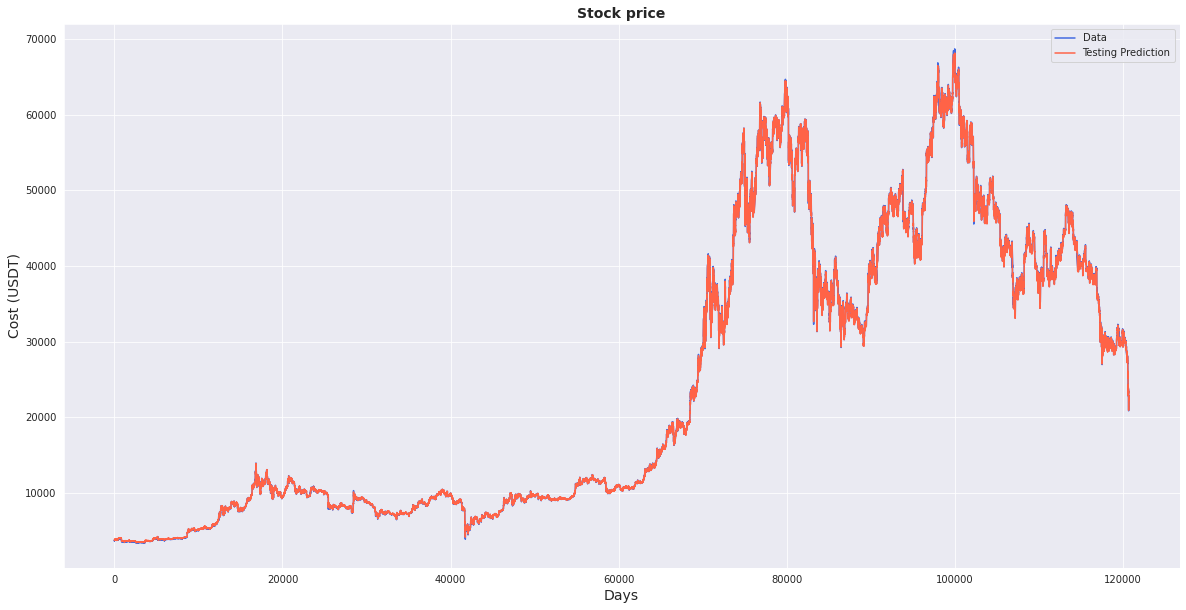

In [30]:
plot_graph(pd.DataFrame(scalers[CLOSE_INDEX].inverse_transform(y_train.numpy().reshape(-1, 1))), 
           pd.DataFrame(scalers[CLOSE_INDEX].inverse_transform(y_train_pred.reshape(-1, 1))))

In [31]:
y_test_pred = lstm_model3.predict(x_test)

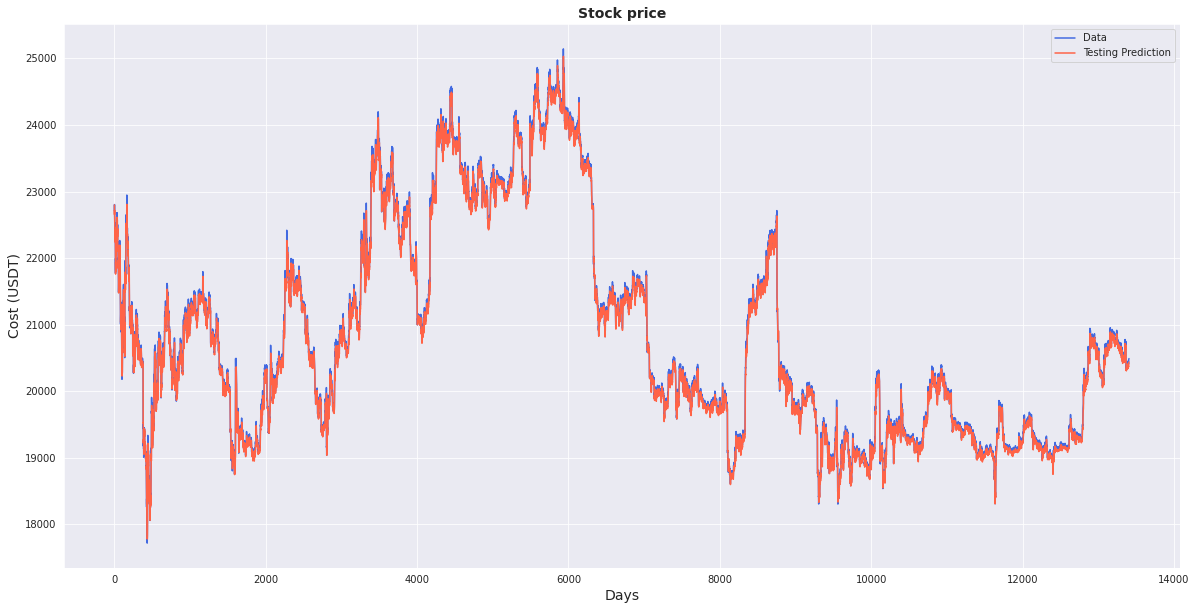

In [32]:
plot_graph(pd.DataFrame(scalers[CLOSE_INDEX].inverse_transform(y_test.numpy().reshape(-1, 1))), 
           pd.DataFrame(scalers[CLOSE_INDEX].inverse_transform(y_test_pred.reshape(-1, 1))))